# Pandas untuk data exploration

## review
- pandas adalah package python
- kita import package ini, lalu kita gunakan
- import data csv/ excel/ dan lainnya
- manipulasi data - tambah/kurang kolom dan rows DataFrame
- grouping dan aggregate - merangkum data untuk analisa
- membuat visualisasi dari data

raw data/ data mentah - biasanya kotor. banyak missing values, bolong2 tidak terisi datanya. ada data yang salah, atau tidak konsisten. data yang aneh sendiri jauh yang dari yang biasanya.

data yang bersifat kotor ini mau kita bersihkan --> data cleaning. data preparation. untuk bisa membersihkan data dengan baik, kita perlu mengerti datanya. kita perlu punya ekspektasi hasil akhir bentuk data yang bersih seperti apa. explore data untuk mengerti data. EDA exploratory data analysis.

## EDA dengan Pandas
1. Missing Values (property_data.csv)
2. Study Case: Obesity in England (obes.xls)
3. Study Case: Time Series

In [1]:
import numpy as np
import pandas as pd

In [2]:
# import data

df_sample = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")

df_sample

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
df_sample = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv",
                        na_values=["--", "na", "-", "unknown"])

df_sample

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [3]:
df_sample.shape

(9, 7)

In [4]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 636.0+ bytes


In [6]:
df_sample_copy = df_sample.copy()

In [7]:
df_sample

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [9]:
df_sample.loc[0, 'PID']

100001000.0

In [10]:
df_sample.tail(1)['PID']

8    100009000.0
Name: PID, dtype: float64

In [11]:
df_sample['PID'] = np.arange(100001000, 100009001, 1000)

df_sample

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000,201.0,BERKELEY,12,1.0,NaN,700.0
4,100005000,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000,213.0,TREMONT,Y,NaN,1,NaN
8,100009000,215.0,TREMONT,Y,NaN,2,1800.0


In [12]:
#isi NaN di ST_NUM dengan angka 0

df_sample['ST_NUM'].fillna(0)

0    104.0
1    197.0
2      0.0
3    201.0
4    203.0
5    207.0
6      0.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [13]:
#isi dengan median
med = df_sample['ST_NUM'].median()
med

203.0

In [14]:
df_sample['ST_NUM'].fillna(med)

0    104.0
1    197.0
2    203.0
3    201.0
4    203.0
5    207.0
6    203.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [15]:
#isi dengan rata2
rata2 = df_sample['ST_NUM'].mean()
rata2 = int(rata2)
print(rata2)

191


In [17]:
df_sample['ST_NUM'] = df_sample['ST_NUM'].fillna(rata2)
df_sample

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000,191.0,LEXINGTON,N,NaN,1,850.0
3,100004000,201.0,BERKELEY,12,1.0,NaN,700.0
4,100005000,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000,191.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000,213.0,TREMONT,Y,NaN,1,NaN
8,100009000,215.0,TREMONT,Y,NaN,2,1800.0


In [28]:
#kolom own_occupied hapus dulu yg invalid
#BACA perbaris hapus yg bukan Y & N

list_OO = []
# index = 0
for data in df_sample['OWN_OCCUPIED']:
    # print(data)
    if(data == 'Y' or data == 'N'):
        #data valid
        list_OO.append(data)
    else :
        list_OO.append("U")
        #menambah kategori baru pada missing value dengan U
    # index = index + 1

list_OO

['Y', 'N', 'N', 'U', 'Y', 'Y', 'U', 'Y', 'Y']

In [29]:
df_sample['OWN_OCCUPIED'] = list_OO
df_sample

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000,191.0,LEXINGTON,N,NaN,1,850.0
3,100004000,201.0,BERKELEY,U,1.0,NaN,700.0
4,100005000,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000,191.0,WASHINGTON,U,2.0,HURLEY,950.0
7,100008000,213.0,TREMONT,Y,NaN,1,NaN
8,100009000,215.0,TREMONT,Y,NaN,2,1800.0


In [30]:
med = df_sample['NUM_BEDROOMS'].median()
med

3.0

In [32]:
df_sample['NUM_BEDROOMS'] = df_sample['NUM_BEDROOMS'].fillna(med)
df_sample

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000,191.0,LEXINGTON,N,3.0,1,850.0
3,100004000,201.0,BERKELEY,U,1.0,NaN,700.0
4,100005000,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000,191.0,WASHINGTON,U,2.0,HURLEY,950.0
7,100008000,213.0,TREMONT,Y,3.0,1,NaN
8,100009000,215.0,TREMONT,Y,3.0,2,1800.0


In [34]:
#NUM_BATH yg invalid di isi 1 saja, untuk 1 bathroom
list_nb = []

for data in df_sample['NUM_BATH']:
    #print(data)
    try :
        a = float(data)
        list_nb.append(a)
    except :
        list_nb.append(np.nan)
        
list_nb

[1.0, 1.5, 1.0, nan, 2.0, 1.0, nan, 1.0, 2.0]

In [35]:
df_sample['NUM_BATH'] = list_nb
df_sample

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000,191.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000,201.0,BERKELEY,U,1.0,NaN,700.0
4,100005000,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000,191.0,WASHINGTON,U,2.0,NaN,950.0
7,100008000,213.0,TREMONT,Y,3.0,1.0,NaN
8,100009000,215.0,TREMONT,Y,3.0,2.0,1800.0


In [36]:
df_sample['NUM_BATH'] = df_sample['NUM_BATH'].fillna(1)
df_sample

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000,191.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000,201.0,BERKELEY,U,1.0,1.0,700.0
4,100005000,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000,191.0,WASHINGTON,U,2.0,1.0,950.0
7,100008000,213.0,TREMONT,Y,3.0,1.0,NaN
8,100009000,215.0,TREMONT,Y,3.0,2.0,1800.0


In [39]:
rata2 = df_sample['SQ_FT'].mean()
df_sample['SQ_FT'] = df_sample['SQ_FT'].fillna(rata2)
df_sample

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000,191.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000,201.0,BERKELEY,U,1.0,1.0,700.0
4,100005000,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000,191.0,WASHINGTON,U,2.0,1.0,950.0
7,100008000,213.0,TREMONT,Y,3.0,1.0,1100.0
8,100009000,215.0,TREMONT,Y,3.0,2.0,1800.0


In [41]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      int64  
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      9 non-null      float64
 6   SQ_FT         9 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 636.0+ bytes


In [42]:
#ubah occupied jadi categorical
df_sample['OWN_OCCUPIED'] = pd.Categorical(df_sample['OWN_OCCUPIED'])

In [43]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PID           9 non-null      int64   
 1   ST_NUM        9 non-null      float64 
 2   ST_NAME       9 non-null      object  
 3   OWN_OCCUPIED  9 non-null      category
 4   NUM_BEDROOMS  9 non-null      float64 
 5   NUM_BATH      9 non-null      float64 
 6   SQ_FT         9 non-null      float64 
dtypes: category(1), float64(4), int64(1), object(1)
memory usage: 705.0+ bytes


## Analyzing Obesity in England

In [56]:
df_obes = pd.read_excel("obes.xls", "7.2", skiprows=4, skipfooter=14)
df_obes = df_obes.drop(index=[0])
df_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [61]:
#sudah berhasil ambil datanya, explore
df_obes = df_obes.rename(columns={"Unnamed: 0" : "Year"})
df_obes

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


lihat trend , apakah ada perubahan (naik , turun)

buat grafik untuk memudahkan analisa

In [62]:
# sebelum membuat line plot, x-axis kita jadikan index, kita buat year sebagai index, sebagai x-axis

df_obes = df_obes.set_index("Year")
df_obes

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<Axes: xlabel='Year'>

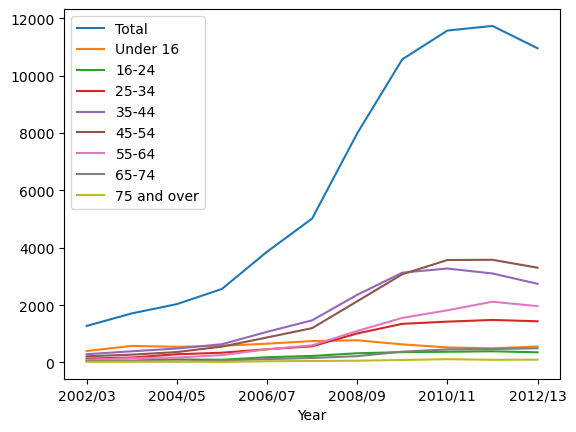

In [64]:
df_obes.plot()

In [66]:
#yg mau di cari adalah anak < 16 tahun, yg total tidak perlu
#drop total , plot ulang
df_obes_age = df_obes.drop(columns=['Total'])
df_obes_age

,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,
2002/03,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<Axes: xlabel='Year'>

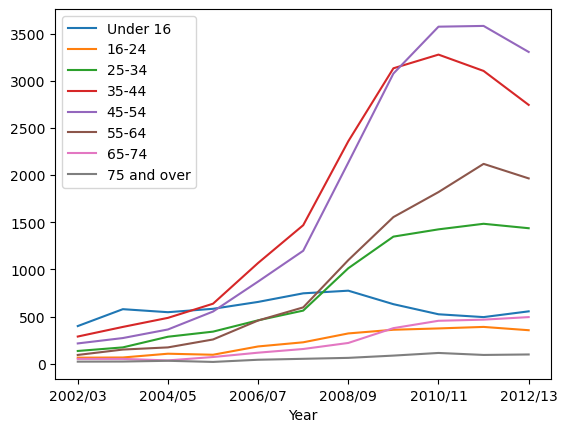

In [67]:
df_obes_age.plot()

hasil plot diatas , anak2 tidak semakin banyak yg obesitas

grup < 16 tahun cukup stabil, hampir rata

obesitas tidak bertambah banyak

grup 35 - 54 tahun yang banyak obesitas, meski di 2012 lebih baik dari 2010

## Study case Time Series

struktur data unik yg ada tanggal berjalan pada data

contoh : data penjualan, data cuaca, data penggunaan listrik.


In [68]:
df_energy = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv")
df_energy.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [69]:
df_energy.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [70]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [71]:
df_energy.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [72]:
df_energy['Date'] = pd.to_datetime(df_energy['Date'])
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [73]:
df_energy = df_energy.set_index("Date")
df_energy

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


<Axes: xlabel='Date'>

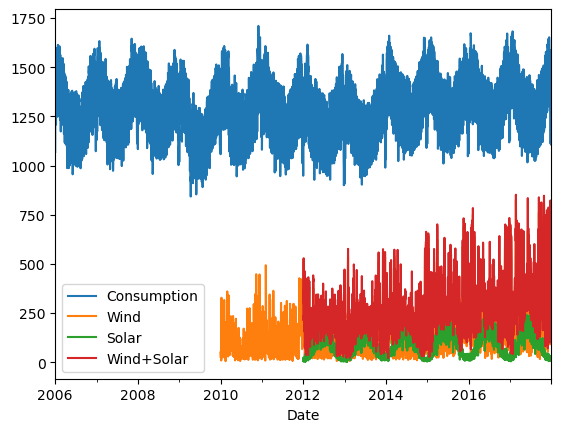

In [74]:
df_energy.plot()

* ubah menjadi per minggu / per bulan untuk membuat pola menjadi lebih halus

* mengambil window / jendela waktu yg lebih pendek misal : 1 tahun untuk melihat trend dalam 1 tahun saja

* tujuannya supaya bisa lihat pola lebih clear, ambil sebagian saja untuk explore

* masih ada data yg belum lengkap => penggunaan energy selain wind & solar , karena penggunaan wind + solar, consumptionnya di atas, ada gap


In [78]:
#resampling : utk menggabungkan data yg banyak menjadi lebih sedikit data point & periode waktu yg lebih besar
#data harian menjadi mingguan, bulanan / tahunan

#untuk time series bisa gunakan .resample() dengan pilihan waktu yg mau di rangkum
#untuk per minggu .resample("W")

#setelah di resample perlu gunakan pandas untuk gabungkan yg dari 7 hari menjadi 1 poin. 
#bisa sum(), mean(), bisa med()

df_energy_weekly = df_energy.resample("W").sum()
df_energy_weekly

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,0.000,0.000,0.000
2006-01-08,9669.10100,0.000,0.000,0.000
2006-01-15,10407.11200,0.000,0.000,0.000
2006-01-22,10430.21800,0.000,0.000,0.000
2006-01-29,10599.23800,0.000,0.000,0.000
...,...,...,...,...
2017-12-03,10753.65420,1990.340,128.246,2118.586
2017-12-10,10883.77462,4455.603,115.082,4570.685
2017-12-17,10806.99822,3097.723,127.006,3224.729


<Axes: xlabel='Date'>

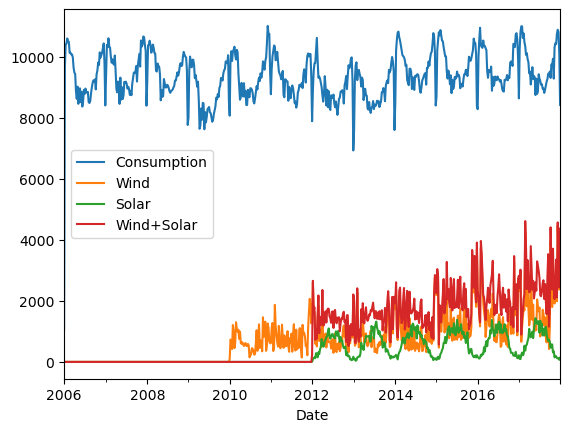

In [80]:
df_energy_weekly.plot()

In [84]:
#data sudah lebih halus
#coba fokus 1 tahun saja
df_energy_weekly.head()

#misal ambil 2012
k = (df_energy_weekly.index.year == 2012)
df_weekly_2012 = df_energy_weekly.loc[k]

<Axes: xlabel='Date'>

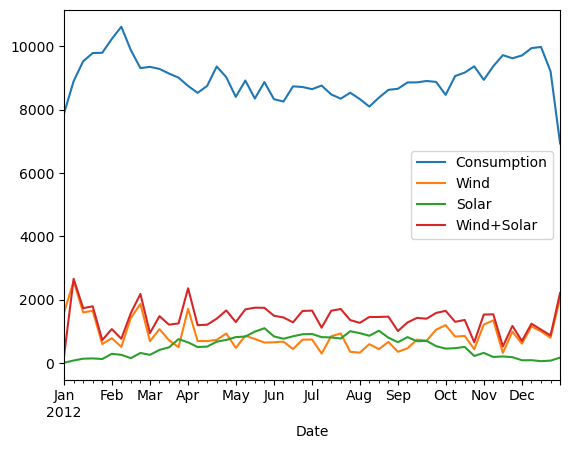

In [85]:
df_weekly_2012.plot()

<Axes: xlabel='Date'>

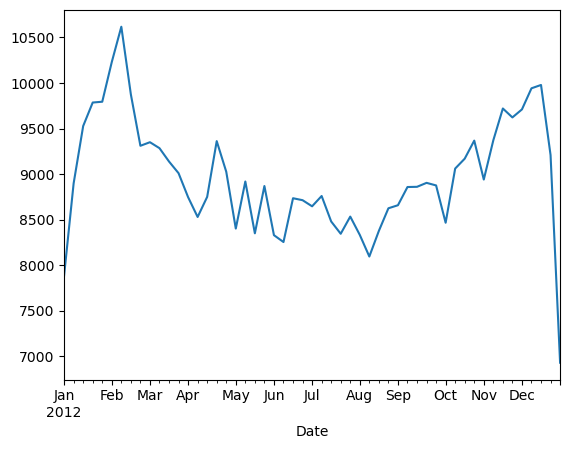

In [86]:
df_weekly_2012['Consumption'].plot()

<Axes: xlabel='Date'>

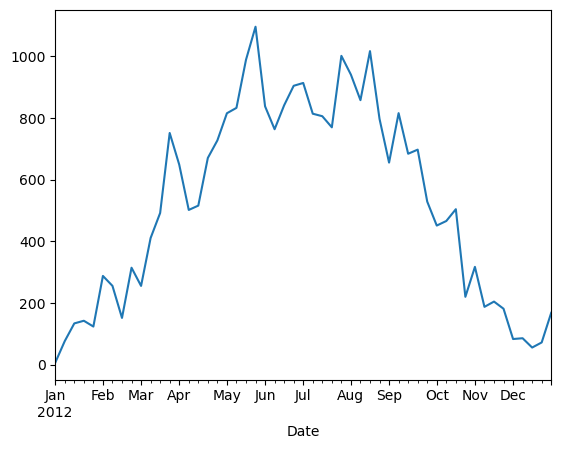

In [87]:
df_weekly_2012['Solar'].plot()

<Axes: xlabel='Date'>

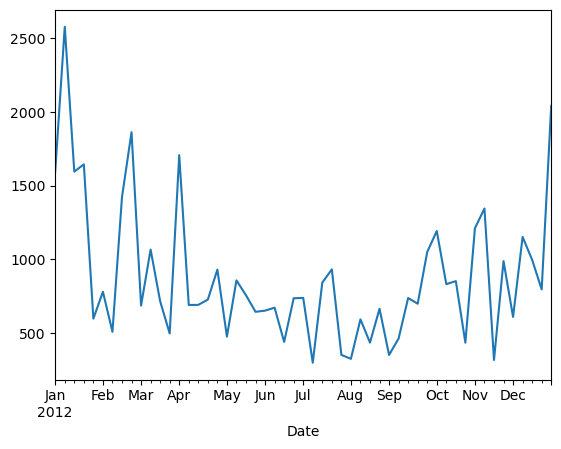

In [88]:
df_weekly_2012['Wind'].plot()

In [89]:
df_daily_2012 = df_energy[df_energy.index.year == 2012]

<Axes: xlabel='Date'>

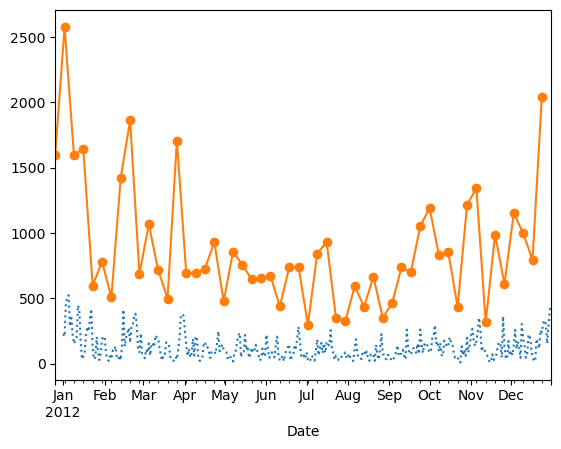

In [90]:
df_daily_2012['Wind'].plot(linestyle="dotted")
df_weekly_2012['Wind'].plot(marker="o", linestyle="-")

<Axes: xlabel='Date'>

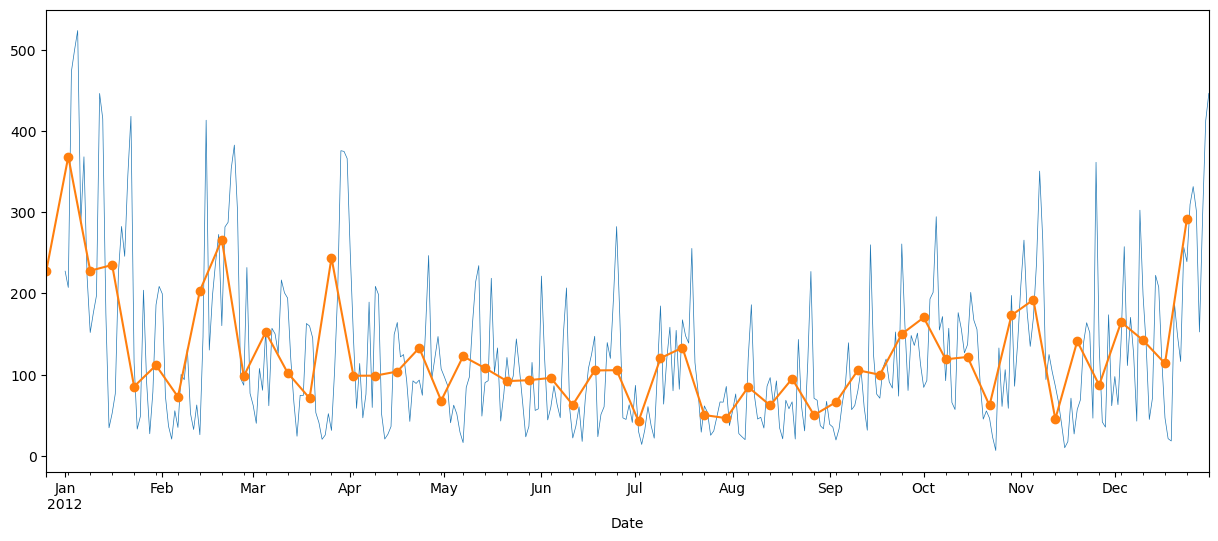

In [91]:
df_weekly_mean = df_energy.resample("W").mean()

df_weekly_mean_2012 = df_weekly_mean[df_weekly_mean.index.year == 2012]

df_daily_2012['Wind'].plot(linewidth=0.5, figsize=(15,6))
df_weekly_mean_2012['Wind'].plot(marker="o", linestyle="-", figsize=(15,6))

<Axes: xlabel='Date'>

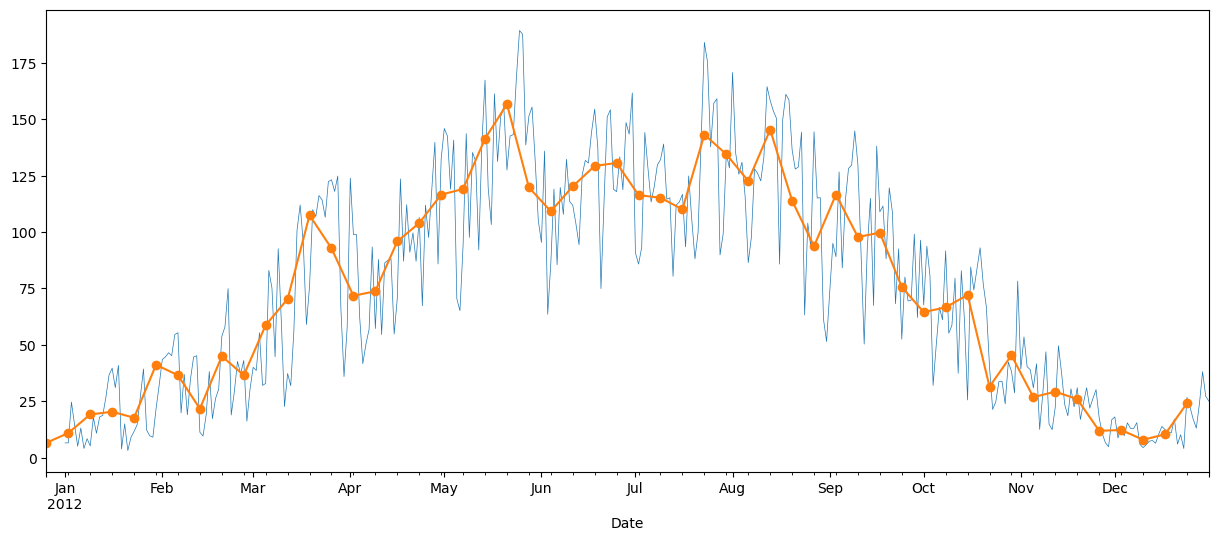

In [92]:
df_daily_2012['Solar'].plot(linewidth=0.5, figsize=(15,6))
df_weekly_mean_2012['Solar'].plot(marker="o", linestyle="-", figsize=(15,6))

<Axes: xlabel='Date'>

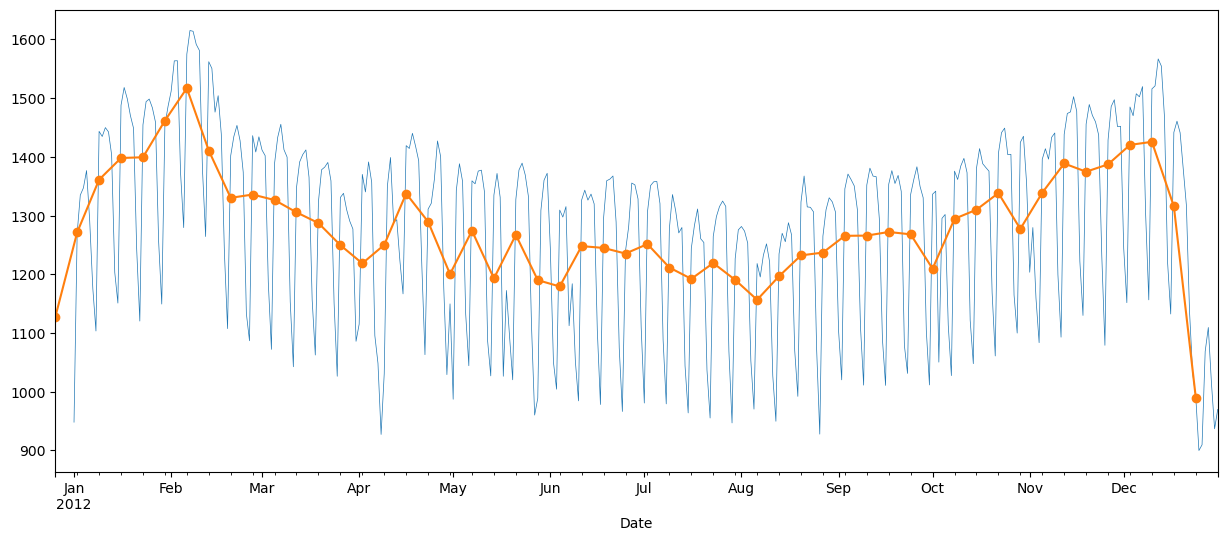

In [93]:
df_daily_2012['Consumption'].plot(linewidth=0.5, figsize=(15,6))
df_weekly_mean_2012['Consumption'].plot(marker="o", linestyle="-", figsize=(15,6))

In [94]:
# ambil data 1 bulan saja, misalnya agustus 2012
df_daily_2012_08 = df_daily_2012.loc[df_daily_2012.index.month == 8]
df_daily_2012_08

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-08-01,1281.360,54.994,170.637,225.631
2012-08-02,1273.384,76.201,134.865,211.066
2012-08-03,1252.979,27.344,125.599,152.943
2012-08-04,1052.731,23.475,130.924,154.399
2012-08-05,970.340,19.899,115.923,135.822
2012-08-06,1218.308,120.776,86.424,207.200
2012-08-07,1195.361,186.065,97.645,283.710
2012-08-08,1232.550,73.492,128.004,201.496
2012-08-09,1251.813,45.277,125.946,171.223


<Axes: xlabel='Date'>

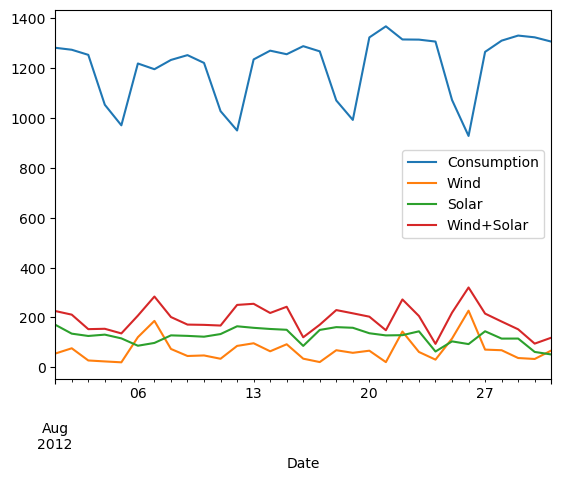

In [95]:
df_daily_2012_08.plot()

In [96]:
df_weekly_2012_08 = df_daily_2012_08.resample("W").mean()
df_weekly_2012_08

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-08-05,1166.158800,40.382600,135.589600,175.972200
2012-08-12,1156.493000,84.700571,122.618429,207.319000
2012-08-19,1196.677429,62.095857,145.334143,207.430000
2012-08-26,1232.143286,94.943429,113.930143,208.873571
2012-09-02,1306.892800,55.364200,97.536600,152.900800


<Axes: xlabel='Date'>

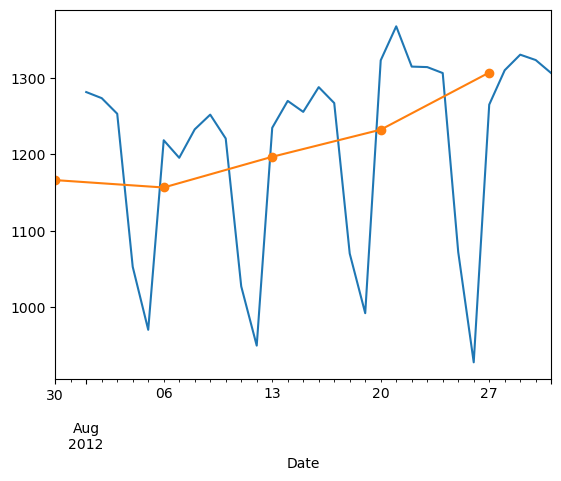

In [97]:
df_daily_2012_08['Consumption'].plot()
df_weekly_2012_08['Consumption'].plot(marker="o")

In [99]:
df_energy.index.weekday

Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       ...
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
      dtype='int32', name='Date', length=4383)

## Cheatsheet Time Series

Monday is 0 , Sunday is 6
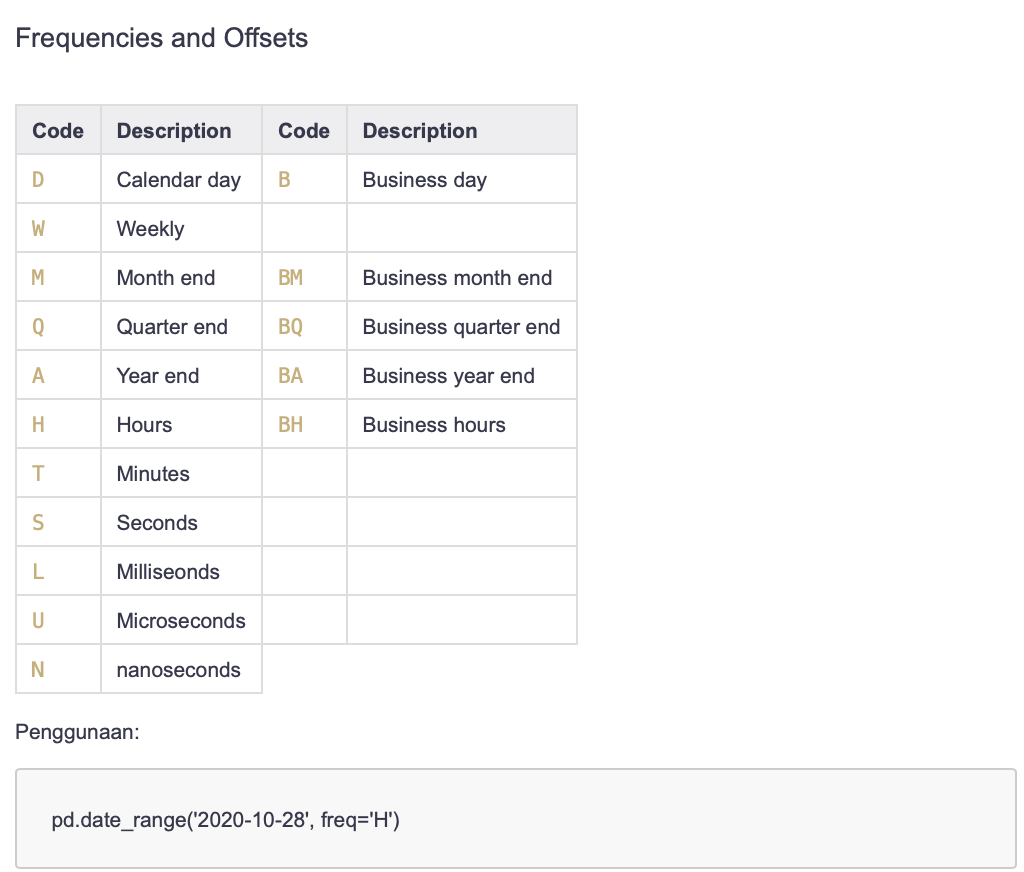

In [101]:
df_energy['hari'] = df_energy.index.weekday
df_energy

,Consumption,Wind,Solar,Wind+Solar,hari
Date,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,6
2006-01-02,1380.52100,NaN,NaN,NaN,0
2006-01-03,1442.53300,NaN,NaN,NaN,1
2006-01-04,1457.21700,NaN,NaN,NaN,2
2006-01-05,1477.13100,NaN,NaN,NaN,3
...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2
2017-12-28,1299.86398,506.424,14.162,520.586,3
2017-12-29,1295.08753,584.277,29.854,614.131,4


<Axes: >

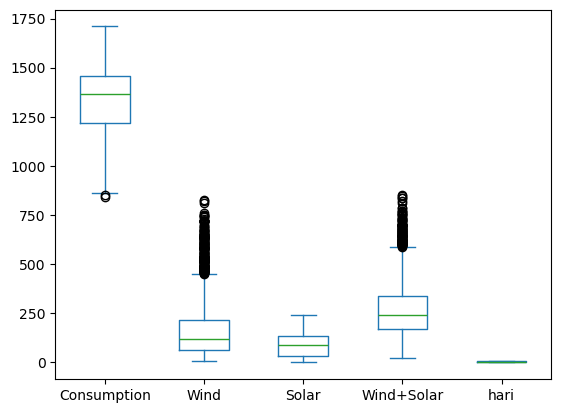

In [102]:
df_energy.plot(kind='box')

<Axes: title={'center': 'Consumption'}, xlabel='hari'>

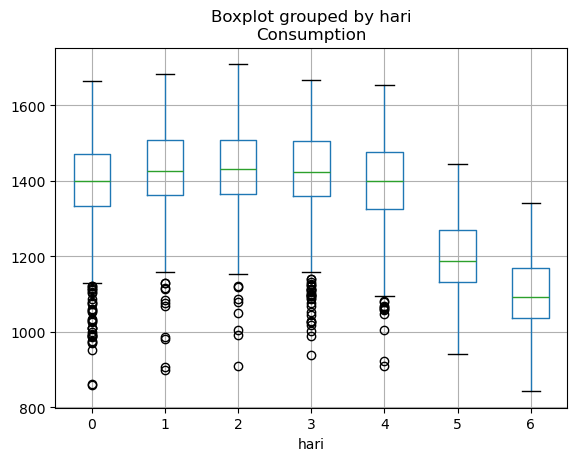

In [105]:
df_energy.boxplot(column=['Consumption'], by="hari")

5 angka summary :
- titik batas outlier atas
- Q3 - 75% dari data value nya di bawah angka ini
- Q2 - 50% dari data value nya di bawah angka ini - median
- Q1 - 25% dari data value nya di bawah angka ini
- titik batas outlier bawah

* bulat2 itu adalah outlier

In [107]:
df_energy['bulan'] = df_energy.index.month
df_energy['tahun'] = df_energy.index.year
df_energy

,Consumption,Wind,Solar,Wind+Solar,hari,bulan,tahun
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,6,1,2006
2006-01-02,1380.52100,NaN,NaN,NaN,0,1,2006
2006-01-03,1442.53300,NaN,NaN,NaN,1,1,2006
2006-01-04,1457.21700,NaN,NaN,NaN,2,1,2006
2006-01-05,1477.13100,NaN,NaN,NaN,3,1,2006
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,3,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,4,12,2017


<Axes: title={'center': 'Consumption'}, xlabel='tahun'>

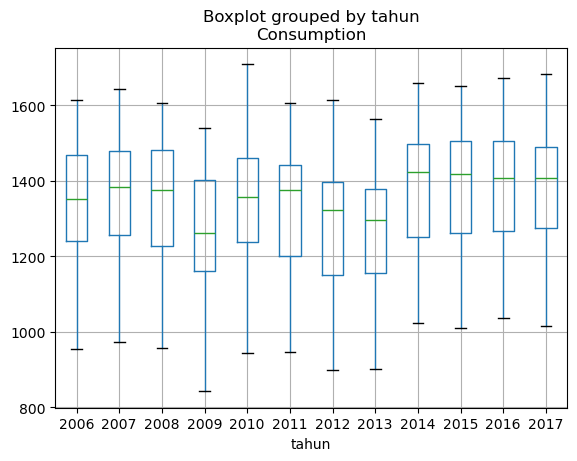

In [108]:
df_energy.boxplot(column=['Consumption'], by="tahun")